In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('phl_exoplanet_catalog_2019.csv')


In [2]:
print(df.shape)



(4048, 112)


In [3]:
approved_columns = [
    'P_MASS',
    'P_RADIUS',
    'P_DENSITY',
    'P_GRAVITY',
    'P_ESCAPE',
    'P_TYPE',
    'P_PERIOD',
    'P_SEMI_MAJOR_AXIS',
    'P_ECCENTRICITY',
    'P_INCLINATION',
    'P_OMEGA',
    'P_PERIASTRON',
    'P_APASTRON',
    'P_IMPACT_PARAMETER',
    'P_HILL_SPHERE',
    'S_MASS',
    'S_RADIUS',
    'S_LUMINOSITY',
    'S_TEMPERATURE',
    'S_AGE',
    'S_METALLICITY',
    'S_LOG_G',
    'S_TYPE',
    'S_MAG',
    'S_DISC',
    'S_MAGNETIC_FIELD',
    'S_SNOW_LINE',
    'S_TIDAL_LOCK',
    'P_DETECTION',
    'S_DISTANCE'
]

missing_cols = [col for col in approved_columns if col not in df.columns]
if missing_cols:
    print("Warning: These columns are missing:", missing_cols)
else:
    print("All 30 approved columns are present!")


df_30 = df[approved_columns].copy()

print(f"Selected dataframe shape: {df_30.shape}")

All 30 approved columns are present!
Selected dataframe shape: (4048, 30)


In [4]:

missing_counts = df_30.isnull().sum()
missing_percent = (missing_counts / len(df_30)) * 100

missing_summary = pd.DataFrame({
    'Feature': approved_columns,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_percent.values
}).sort_values('Missing_Percentage', ascending=False).reset_index(drop=True)


missing_summary.style.format({
    'Missing_Percentage': '{:.2f}%'
})

,Feature,Missing_Count,Missing_Percentage
0,S_MAGNETIC_FIELD,4048,100.00%
1,S_DISC,4048,100.00%
2,P_ESCAPE,3342,82.56%
3,P_DENSITY,3342,82.56%
4,P_GRAVITY,3342,82.56%
5,P_OMEGA,3302,81.57%
6,P_INCLINATION,3204,79.15%
7,S_TYPE,2678,66.16%
8,P_ECCENTRICITY,2668,65.91%
9,P_IMPACT_PARAMETER,2639,65.19%


/tmp/ipython-input-2603584628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_summary, y='Feature', x='Missing_Percentage', palette='viridis')


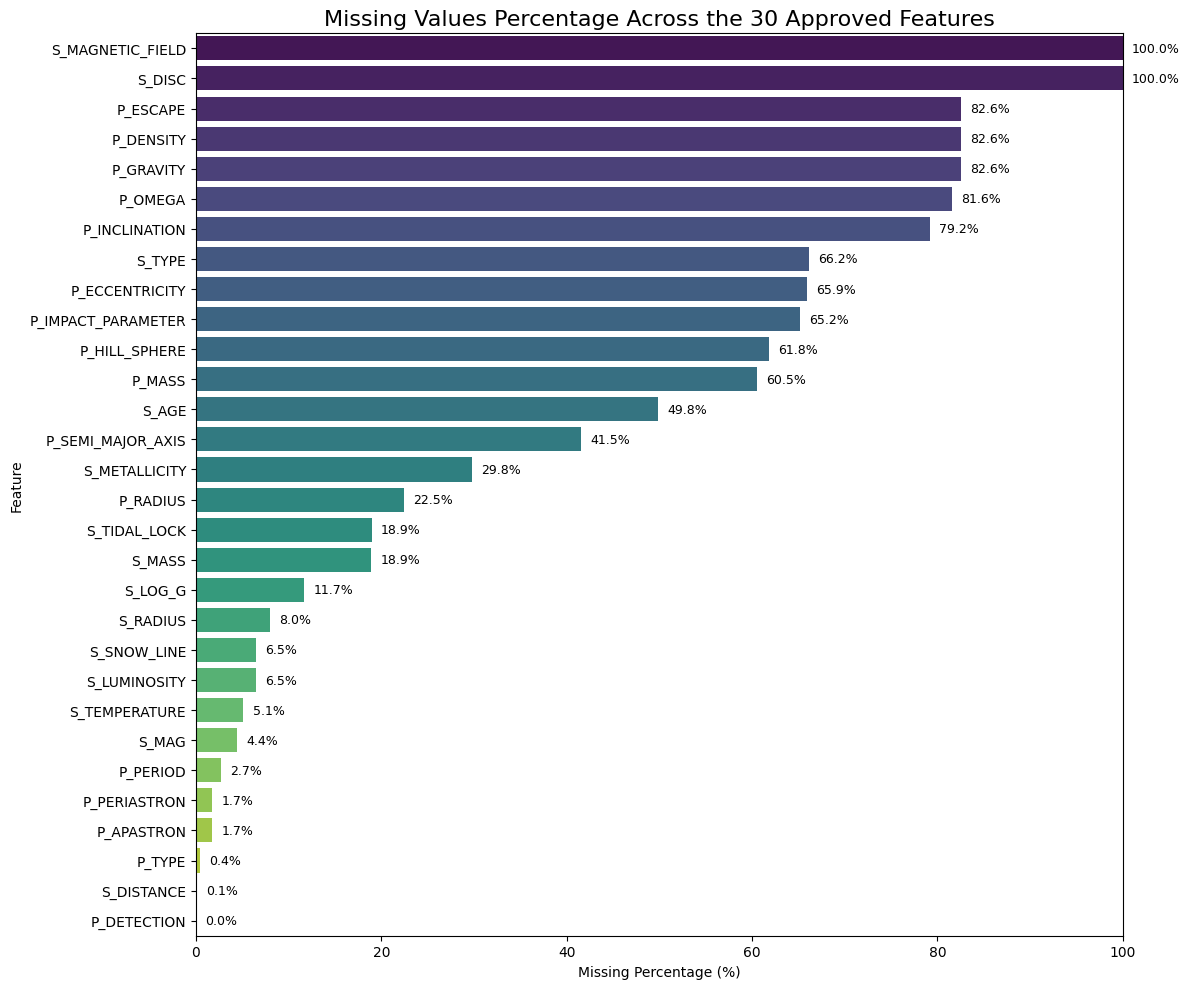

In [5]:
plt.figure(figsize=(12, 10))
sns.barplot(data=missing_summary, y='Feature', x='Missing_Percentage', palette='viridis')
plt.title('Missing Values Percentage Across the 30 Approved Features', fontsize=16)
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Feature')
plt.xlim(0, 100)
for i, v in enumerate(missing_summary['Missing_Percentage']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)
plt.tight_layout()
plt.show()